# PROJECT-2 ML AWS SAGEMAKER

# SIMPLE LINEAR REGRESSION. (Relationship between two variables only).

## y = m * x + b  , y:Depedent variable (ex:Insurance Premium(Rs)), m:Model/Goal/Gradient, x:Independent Variable(ex: Age), b: intercept of the y-axis.

# # MULTIPLE LINEAR REGRESSION. (Relationship between More than two variables)

# y = b0 + b1 * x1 + b2 * x2 + ......+bn * xn,    y :Depedent variable(ex:Insurance premium) ,  x: Independent variable( Ex: age, Smoking habit, region)

# Each independent variable has own corresponding co-efficient.

# Resudial(Error )= yi^ - yi,                       yi^: estimated/predicted   , yi: actual

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT
Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

Features available are:

sex: insurance contractor gender, female, male

bmi: Body mass index (ideally 18.5 to 24.9)

children: Number of children covered by health insurance / Number of dependents

smoker: smoking habits

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Data Source:https://www.kaggle.com/mirichoi0218/insurance

# TASK #2: IMPORT LIBRARIES AND DATASETS
TYPES OF AVAILABLE SAGEMAKER IMAGES

Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.

Base Python [python-3.6]

MXNet (optimized for CPU) [mxnet-1.6-cpu-py36]

MXNet (optimized for GPU) [mxnet-1.6-gpu-py36]

PyTorch (optimized for CPU) [pytorch-1.4-cpu-py36]

PyTorch (optimized for GPU) [pytorch-1.4-gpu-py36]

TensorFlow (optimized for CPU) [tensorflow-1.15-cpu-py36]

TensorFlow (optimized for GPU) [tensorflow-1.15-gpu-py36]

TensorFlow 2 (optimized for CPU) [tensorflow-2.1-cpu-py36]

TensorFlow 2 (optimized for GPU) [tensorflow-2.1-gpu-py36]

# Task 1: Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# read the csv file 
df = pd.read_csv('insurance_data.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# TASK-2:  PERFORM EXPLORATORY DATA ANALYSIS:

In [2]:
# check if there are any Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
# check if there are any Null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index

#df_region = df.groupby(by='region').mean()
#df_region

In [6]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['sex'].apply(lambda x: 0 if x == 'female' else 1)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [8]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

df.head()

age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['smoker'].apply( lambda x: 0 if x == 'no' else 1)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [11]:
df['smoker'] = df['smoker'].apply( lambda x: 0 if x == 'no' else 1)
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)                 
Convert categorical variable into dummy/indicator variables.

In [13]:
pd.get_dummies(df['region'], drop_first=False, dtype=int)

northeast  northwest  southeast  southwest
0             0          0          0          1
1             0          0          1          0
2             0          0          1          0
3             0          1          0          0
4             0          1          0          0
...         ...        ...        ...        ...
1333          0          1          0          0
1334          1          0          0          0
1335          0          0          1          0
1336          0          0          0          1
1337          0          1          0          0

[1338 rows x 4 columns]

In [14]:
pd.get_dummies(df['region'], drop_first=True, dtype=int)

northwest  southeast  southwest
0             0          0          1
1             0          1          0
2             0          1          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
1333          1          0          0
1334          0          0          0
1335          0          1          0
1336          0          0          1
1337          1          0          0

[1338 rows x 3 columns]

In [15]:
region_dummies = pd.get_dummies(df['region'], drop_first=True, dtype=int)
region_dummies

northwest  southeast  southwest
0             0          0          1
1             0          1          0
2             0          1          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
1333          1          0          0
1334          0          0          0
1335          0          1          0
1336          0          0          1
1337          1          0          0

[1338 rows x 3 columns]

In [16]:
df = pd.concat([df, region_dummies], axis='columns')
df

age  sex     bmi  children  smoker     region      charges  northwest  \
0      19    0  27.900         0       1  southwest  16884.92400          0   
1      18    1  33.770         1       0  southeast   1725.55230          0   
2      28    1  33.000         3       0  southeast   4449.46200          0   
3      33    1  22.705         0       0  northwest  21984.47061          1   
4      32    1  28.880         0       0  northwest   3866.85520          1   
...   ...  ...     ...       ...     ...        ...          ...        ...   
1333   50    1  30.970         3       0  northwest  10600.54830          1   
1334   18    0  31.920         0       0  northeast   2205.98080          0   
1335   18    0  36.850         0       0  southeast   1629.83350          0   
1336   21    0  25.800         0       0  southwest   2007.94500          0   
1337   61    0  29.070         0       1  northwest  29141.36030          1   

      southeast  southwest  
0             0          1  
1             1          0  
2             1          0  
3             0          0  
4             0          0  
...         ...        ...  
1333          0          0  
1334          0          0  
1335          1          0  
1336          0          1  
1337          0          0  

[1338 rows x 10 columns]

In [17]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = df.groupby(by='region').mean().reset_index()
df_region

region        age       sex        bmi  children    smoker  \
0  northeast  39.268519  0.503086  29.173503  1.046296  0.206790   
1  northwest  39.196923  0.495385  29.199785  1.147692  0.178462   
2  southeast  38.939560  0.519231  33.355989  1.049451  0.250000   
3  southwest  39.455385  0.501538  30.596615  1.141538  0.178462   

        charges  northwest  southeast  southwest  
0  13406.384516        0.0        0.0        0.0  
1  12417.575374        1.0        0.0        0.0  
2  14735.411438        0.0        1.0        0.0  
3  12346.937377        0.0        0.0        1.0

In [18]:
df.head()

age  sex     bmi  children  smoker     region      charges  northwest  \
0   19    0  27.900         0       1  southwest  16884.92400          0   
1   18    1  33.770         1       0  southeast   1725.55230          0   
2   28    1  33.000         3       0  southeast   4449.46200          0   
3   33    1  22.705         0       0  northwest  21984.47061          1   
4   32    1  28.880         0       0  northwest   3866.85520          1   

   southeast  southwest  
0          0          1  
1          1          0  
2          1          0  
3          0          0  
4          0          0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 104.7+ KB


In [20]:
# Let's drop the original 'region' column 
df.drop(['region'], axis = 1, inplace = True)
df.head()

age  sex     bmi  children  smoker      charges  northwest  southeast  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          1   
2   28    1  33.000         3       0   4449.46200          0          1   
3   33    1  22.705         0       0  21984.47061          1          0   
4   32    1  28.880         0       0   3866.85520          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0

In [21]:
# Grouping by region to see any relationship between age and charges

df_age = df.groupby(by='age').mean().reset_index()
df_age.head()

age       sex        bmi  children    smoker       charges  northwest  \
0   18  0.521739  31.326159  0.449275  0.173913   7086.217556   0.000000   
1   19  0.514706  28.596912  0.426471  0.264706   9747.909335   0.500000   
2   20  0.517241  30.632759  0.862069  0.310345  10159.697736   0.241379   
3   21  0.535714  28.185714  0.785714  0.071429   4730.464330   0.250000   
4   22  0.535714  31.087679  0.714286  0.214286  10012.932802   0.250000   

   southeast  southwest  
0   0.536232   0.000000  
1   0.044118   0.455882  
2   0.275862   0.275862  
3   0.250000   0.250000  
4   0.285714   0.214286

### Calculate the mean and standard deviation of the age, charges and bmi.

In [22]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges    northwest    southeast    southwest  
count   1338.000000  1338.000000  1338.000000  1338.000000  
mean   13270.422265     0.242900     0.272048     0.242900  
std    12110.011237     0.428995     0.445181     0.428995  
min     1121.873900     0.000000     0.000000     0.000000  
25%     4740.287150     0.000000     0.000000     0.000000  
50%     9382.033000     0.000000     0.000000     0.000000  
75%    16639.912515     0.000000     1.000000     0.000000  
max    63770.428010     1.000000     1.000000     1.000000

# TASK #3: VISUALIZE DATASET.

## Histogram.   A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

In [23]:
df.head()

age  sex     bmi  children  smoker      charges  northwest  southeast  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          1   
2   28    1  33.000         3       0   4449.46200          0          1   
3   33    1  22.705         0       0  21984.47061          1          0   
4   32    1  28.880         0       0   3866.85520          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0

In [24]:
df.groupby(df['age']).count()

sex  bmi  children  smoker  charges  northwest  southeast  southwest
age                                                                      
18    69   69        69      69       69         69         69         69
19    68   68        68      68       68         68         68         68
20    29   29        29      29       29         29         29         29
21    28   28        28      28       28         28         28         28
22    28   28        28      28       28         28         28         28
23    28   28        28      28       28         28         28         28
24    28   28        28      28       28         28         28         28
25    28   28        28      28       28         28         28         28
26    28   28        28      28       28         28         28         28
27    28   28        28      28       28         28         28         28
28    28   28        28      28       28         28         28         28
29    27   27        27      27       27         27         27         27
30    27   27        27      27       27         27         27         27
31    27   27        27      27       27         27         27         27
32    26   26        26      26       26         26         26         26
33    26   26        26      26       26         26         26         26
34    26   26        26      26       26         26         26         26
35    25   25        25      25       25         25         25         25
36    25   25        25      25       25         25         25         25
37    25   25        25      25       25         25         25         25
38    25   25        25      25       25         25         25         25
39    25   25        25      25       25         25         25         25
40    27   27        27      27       27         27         27         27
41    27   27        27      27       27         27         27         27
42    27   27        27      27       27         27         27         27
43    27   27        27      27       27         27         27         27
44    27   27        27      27       27         27         27         27
45    29   29        29      29       29         29         29         29
46    29   29        29      29       29         29         29         29
47    29   29        29      29       29         29         29         29
48    29   29        29      29       29         29         29         29
49    28   28        28      28       28         28         28         28
50    29   29        29      29       29         29         29         29
51    29   29        29      29       29         29         29         29
52    29   29        29      29       29         29         29         29
53    28   28        28      28       28         28         28         28
54    28   28        28      28       28         28         28         28
55    26   26        26      26       26         26         26         26
56    26   26        26      26       26         26         26         26
57    26   26        26      26       26         26         26         26
58    25   25        25      25       25         25         25         25
59    25   25        25      25       25         25         25         25
60    23   23        23      23       23         23         23         23
61    23   23        23      23       23         23         23         23
62    23   23        23      23       23         23         23         23
63    23   23        23      23       23         23         23         23
64    22   22        22      22       22         22         22         22

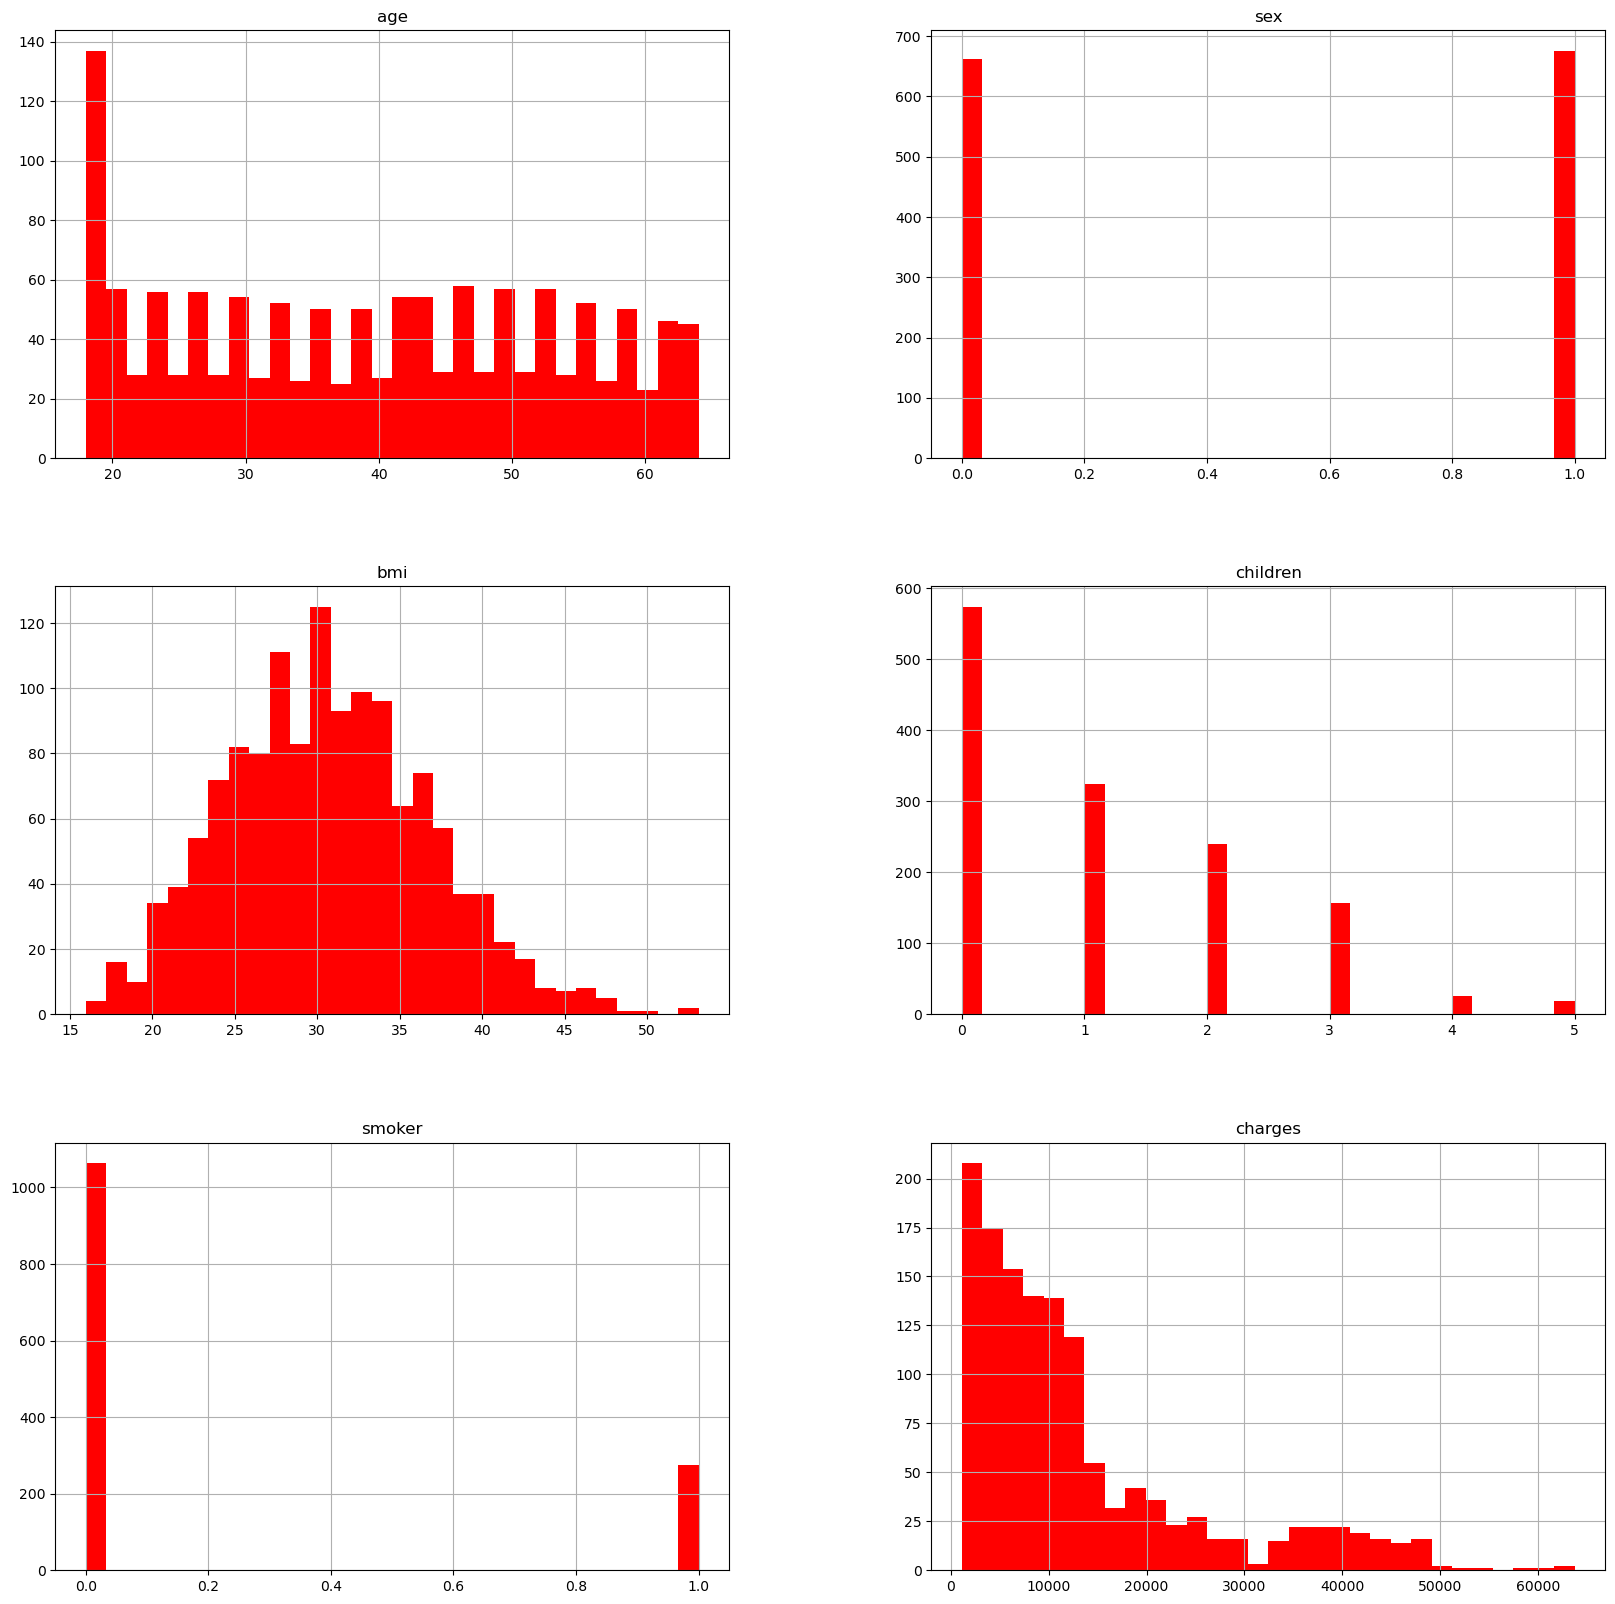

In [25]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r');

#x axis is 'age' and y-axis is 'count'

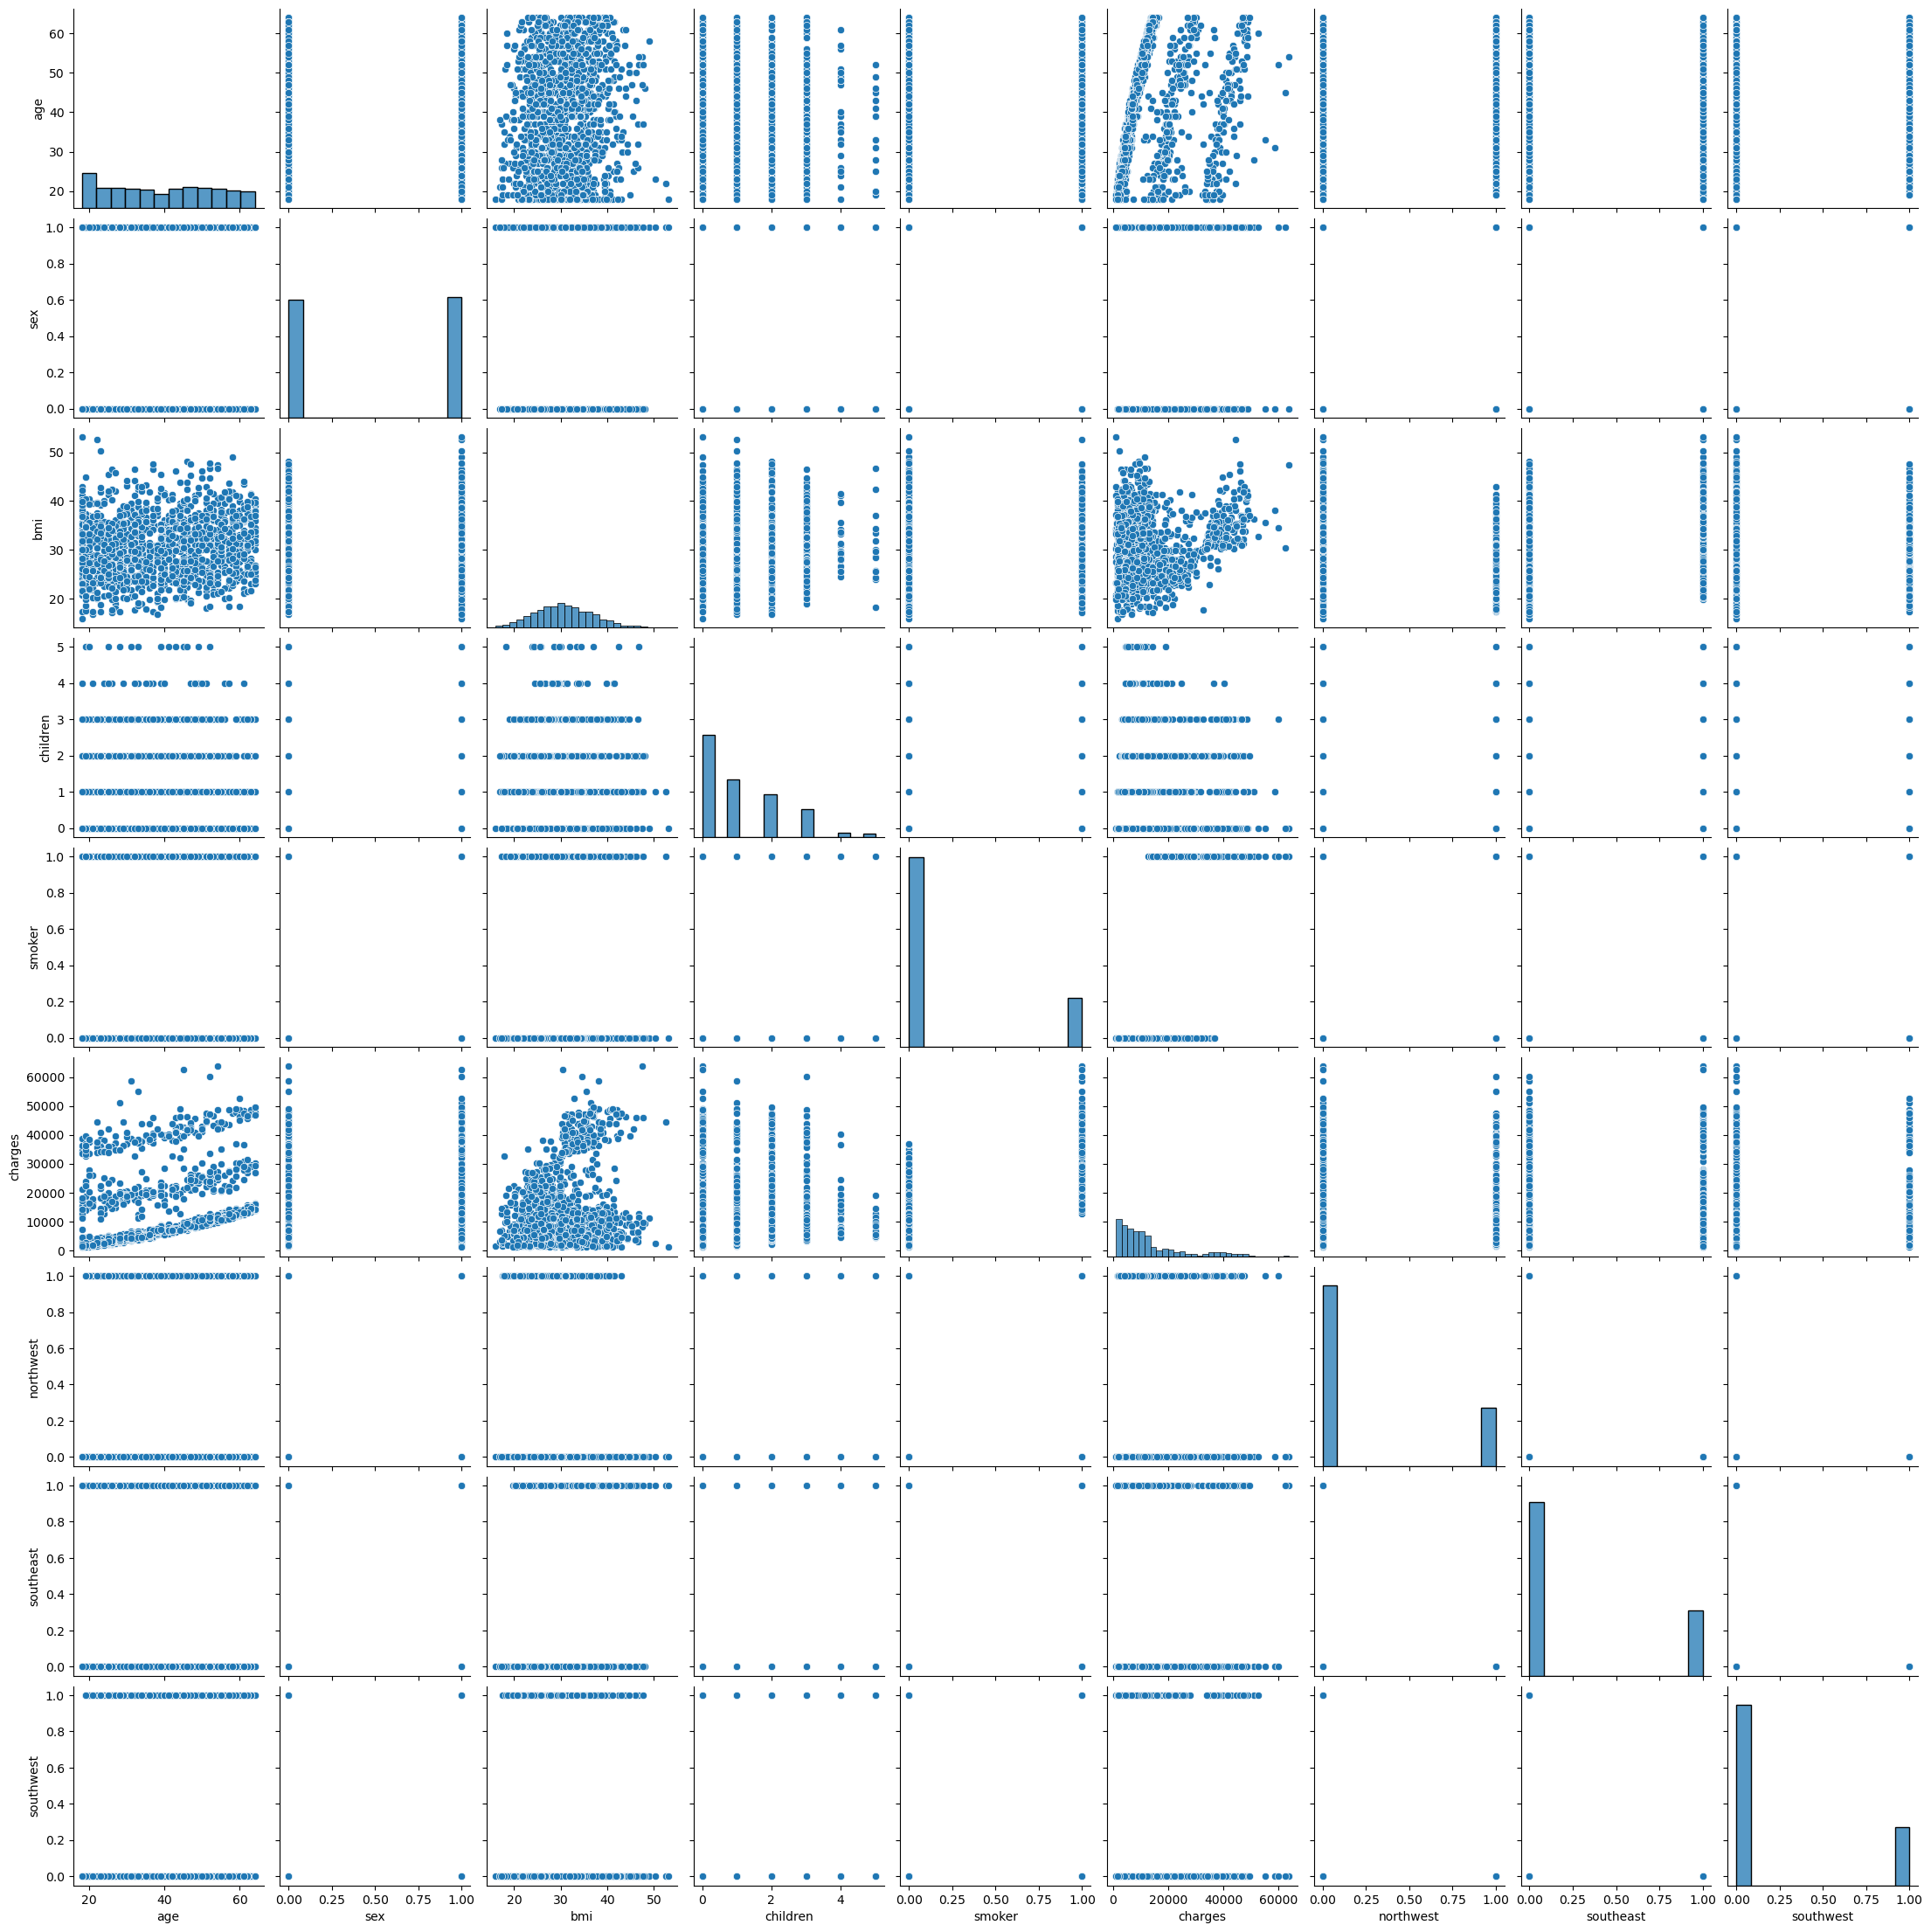

In [26]:
# plot pairplot

sns.pairplot(df)
plt.show()

In [27]:
df[['age','sex','bmi','smoker','charges']]

age  sex     bmi  smoker      charges
0      19    0  27.900       1  16884.92400
1      18    1  33.770       0   1725.55230
2      28    1  33.000       0   4449.46200
3      33    1  22.705       0  21984.47061
4      32    1  28.880       0   3866.85520
...   ...  ...     ...     ...          ...
1333   50    1  30.970       0  10600.54830
1334   18    0  31.920       0   2205.98080
1335   18    0  36.850       0   1629.83350
1336   21    0  25.800       0   2007.94500
1337   61    0  29.070       1  29141.36030

[1338 rows x 5 columns]

In [28]:
df.head()

age  sex     bmi  children  smoker      charges  northwest  southeast  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          1   
2   28    1  33.000         3       0   4449.46200          0          1   
3   33    1  22.705         0       0  21984.47061          1          0   
4   32    1  28.880         0       0   3866.85520          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0

In [29]:
df.iloc[:,[0,1,2,4,5]]

age  sex     bmi  smoker      charges
0      19    0  27.900       1  16884.92400
1      18    1  33.770       0   1725.55230
2      28    1  33.000       0   4449.46200
3      33    1  22.705       0  21984.47061
4      32    1  28.880       0   3866.85520
...   ...  ...     ...     ...          ...
1333   50    1  30.970       0  10600.54830
1334   18    0  31.920       0   2205.98080
1335   18    0  36.850       0   1629.83350
1336   21    0  25.800       0   2007.94500
1337   61    0  29.070       1  29141.36030

[1338 rows x 5 columns]

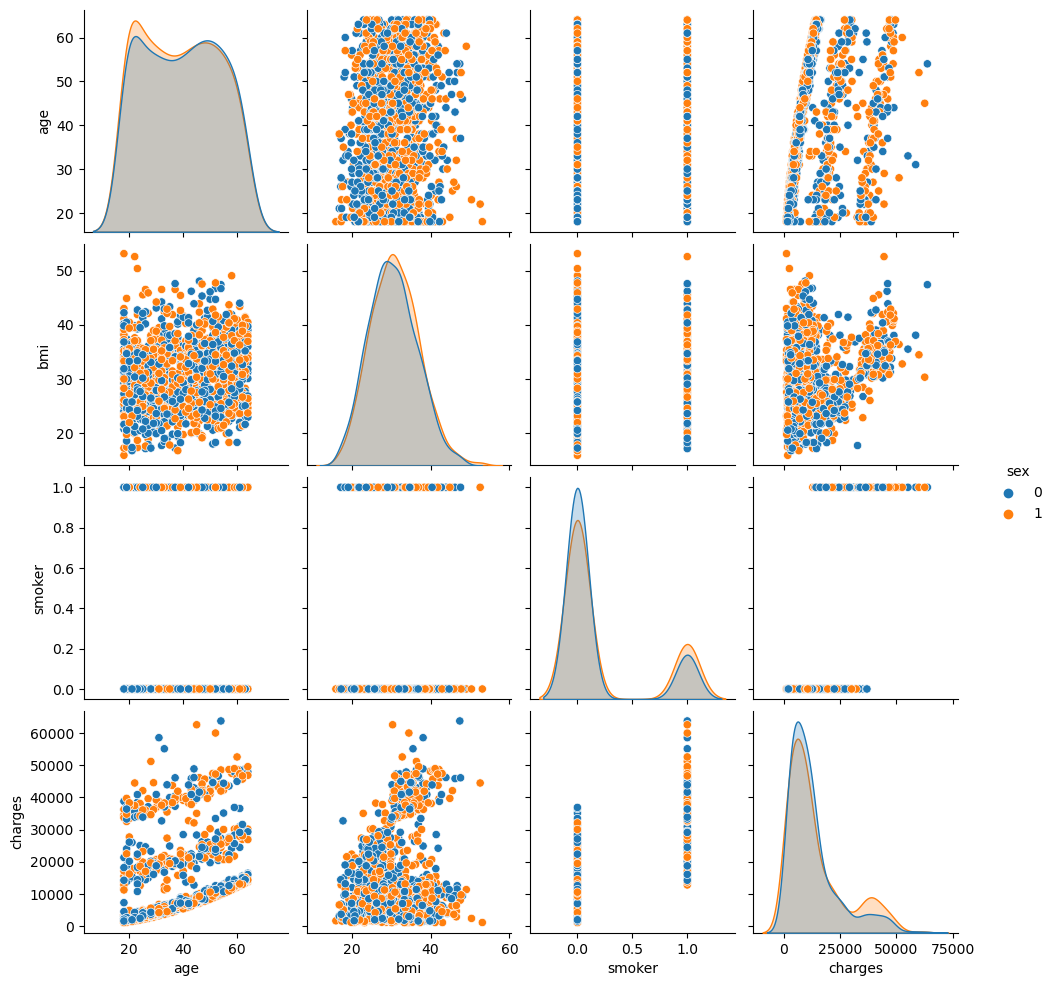

In [30]:
# plot pairplot
data = df[['sex','age','bmi','smoker','charges']]
sns.pairplot(data, hue="sex")
plt.show()

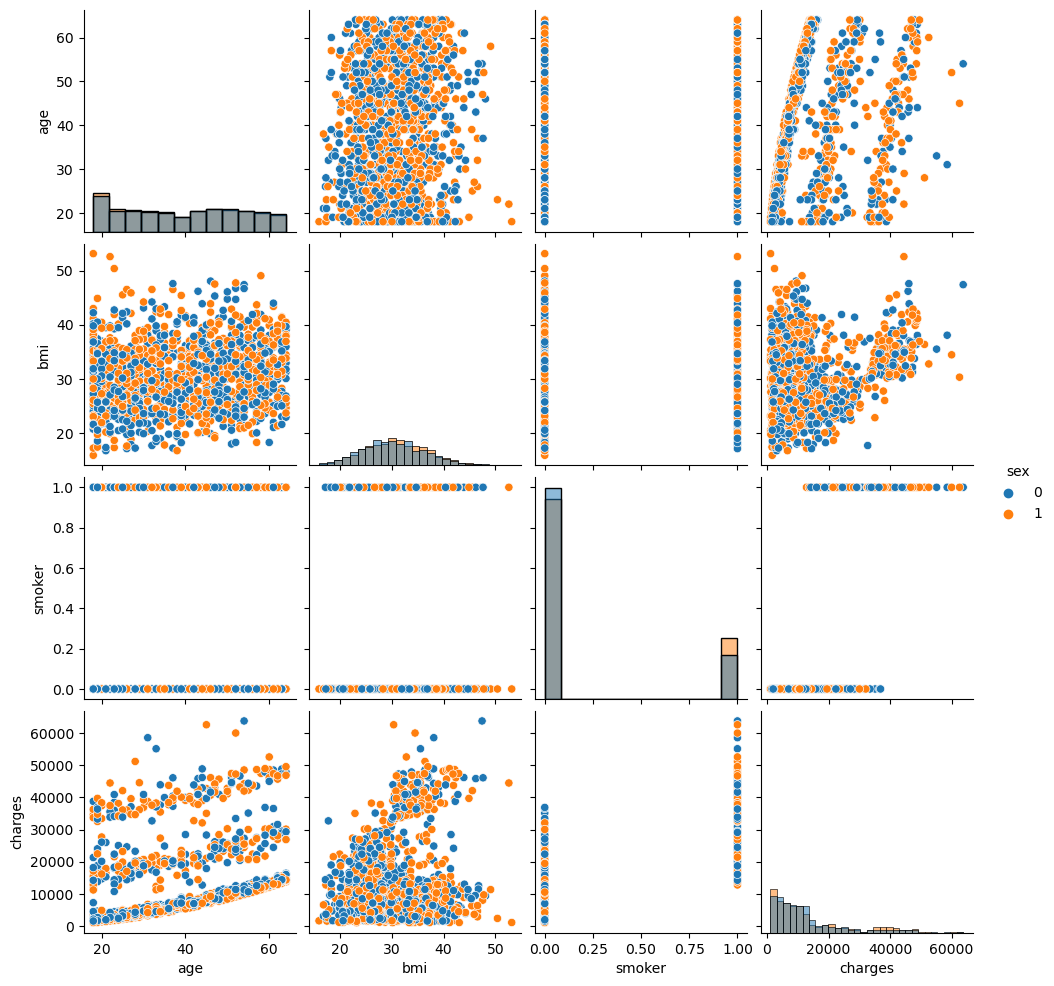

In [31]:
sns.pairplot(data, hue="sex", diag_kind="hist");

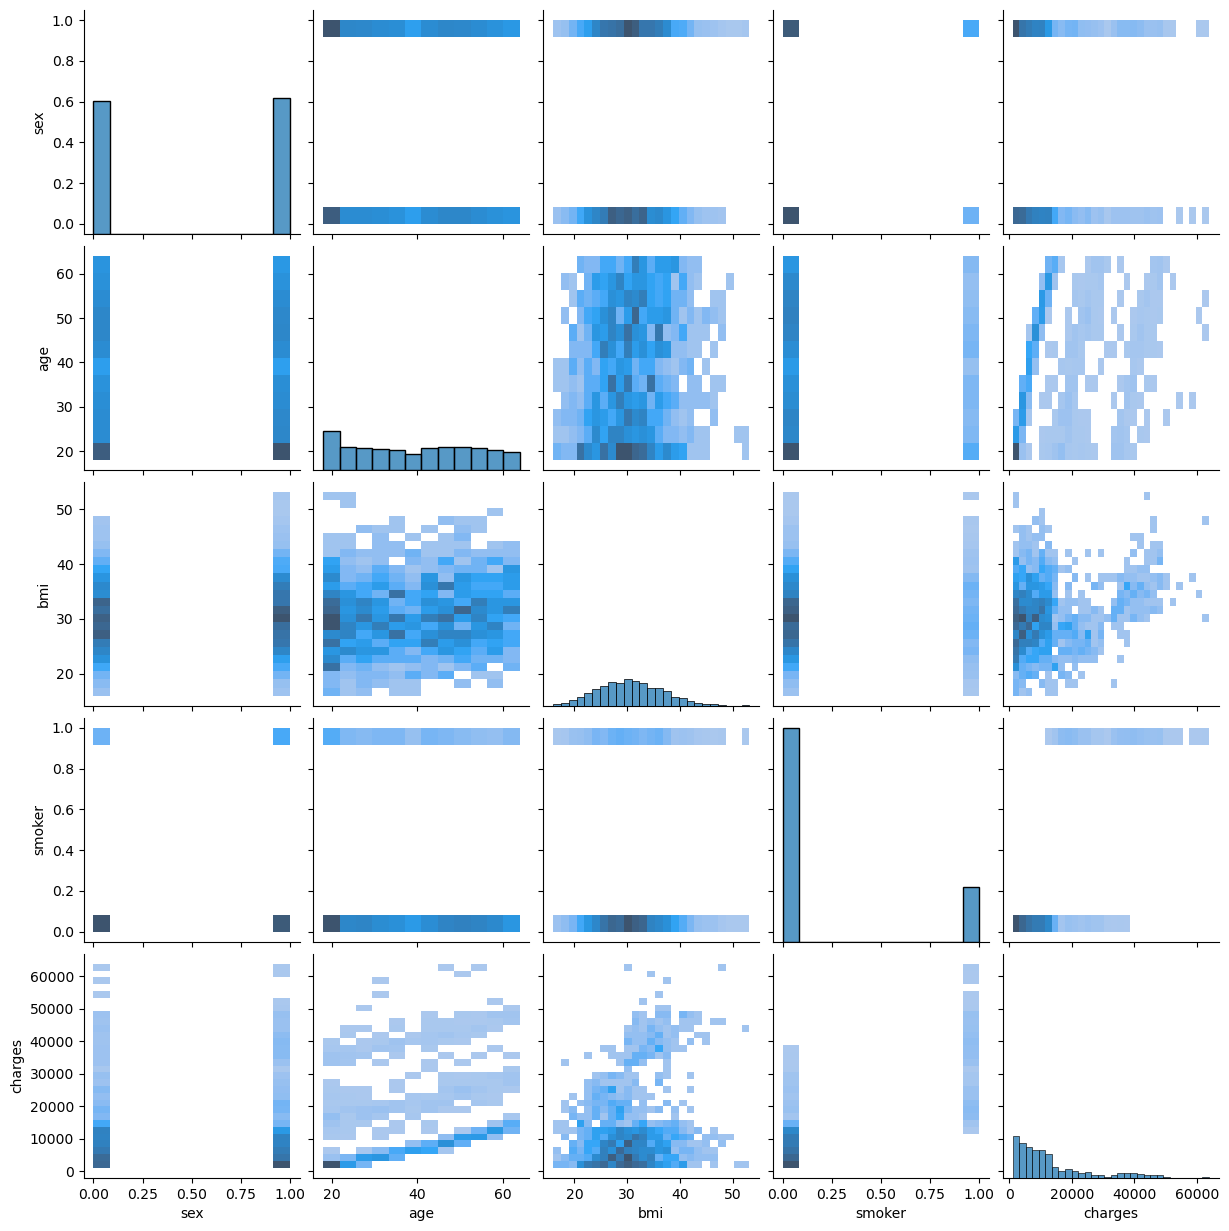

In [32]:
sns.pairplot(data,  kind="hist");

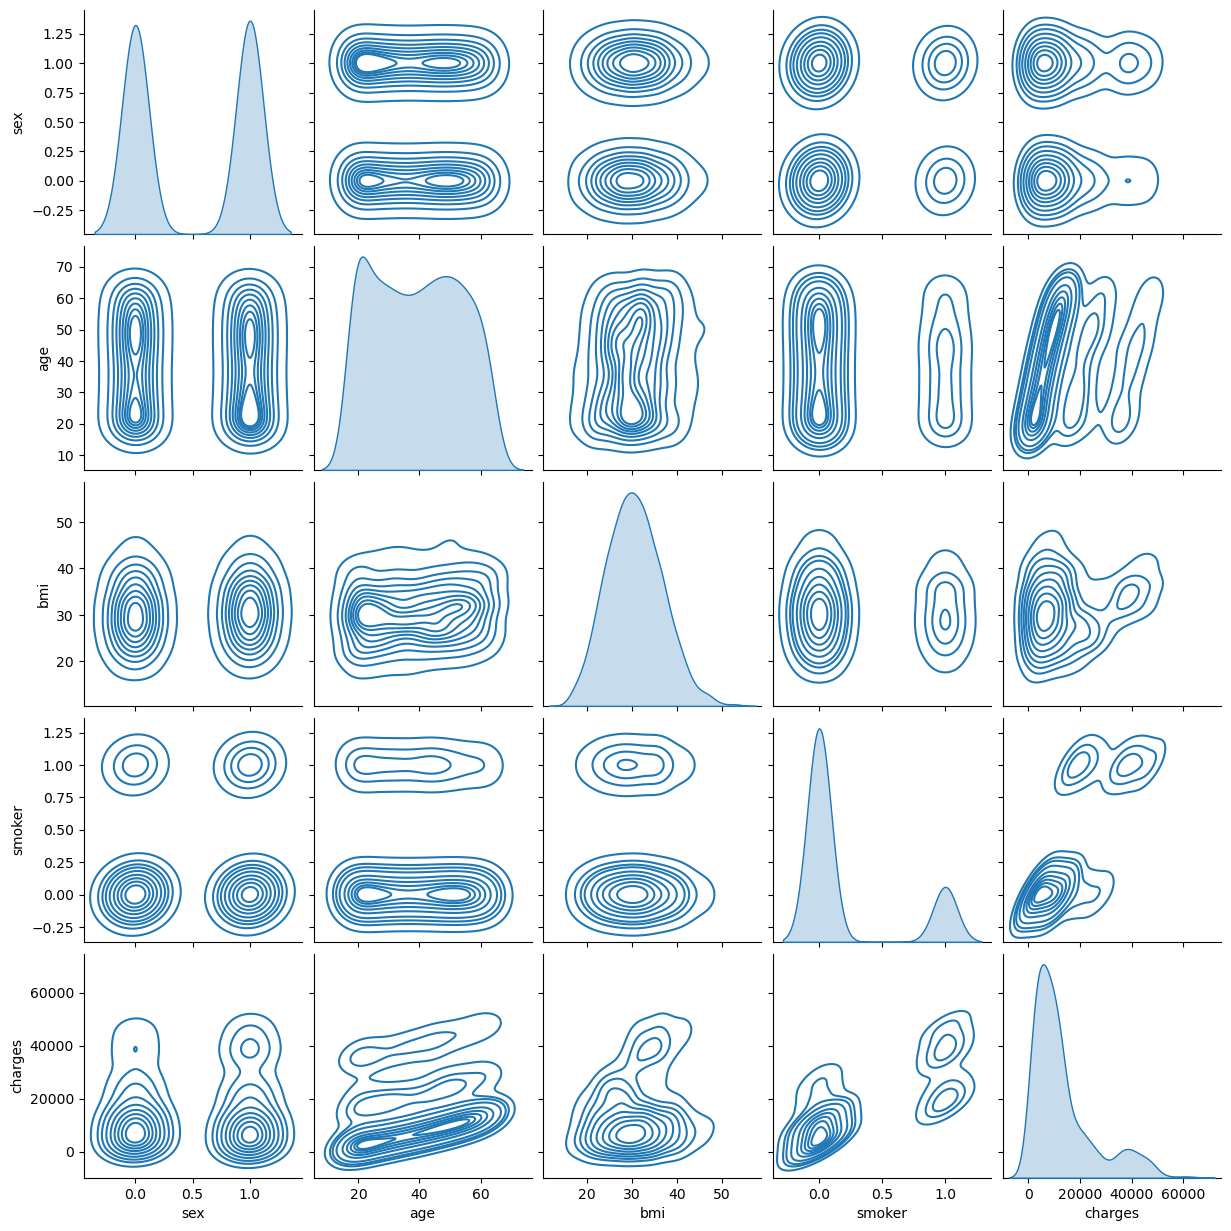

In [33]:
sns.pairplot(data,  kind="kde");

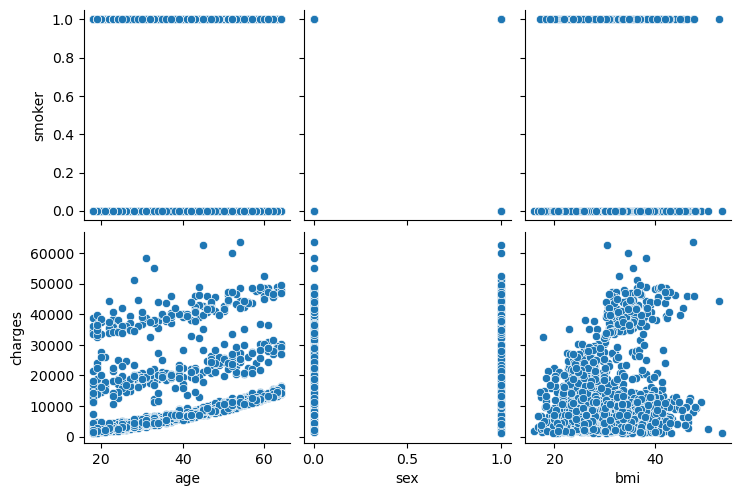

In [34]:
sns.pairplot(
    data,
    x_vars=["age","sex","bmi"],
    y_vars=["smoker","charges"],
);

# regplot: Plot data and a linear regression model fit.Plot a simple linear regression model.

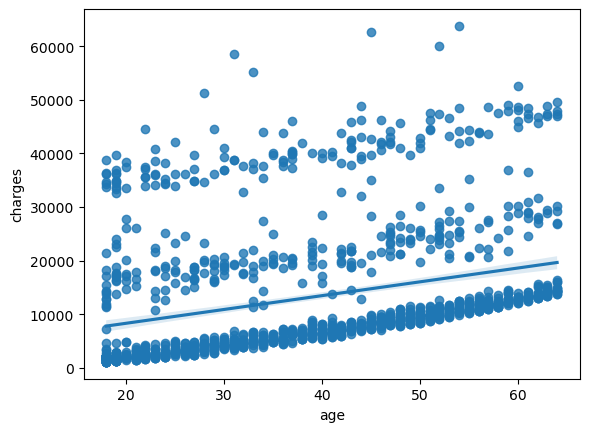

In [35]:
sns.regplot(x = 'age', y = 'charges', data = df)
plt.show();
  

## Obtain the regplot between bmi and charges.

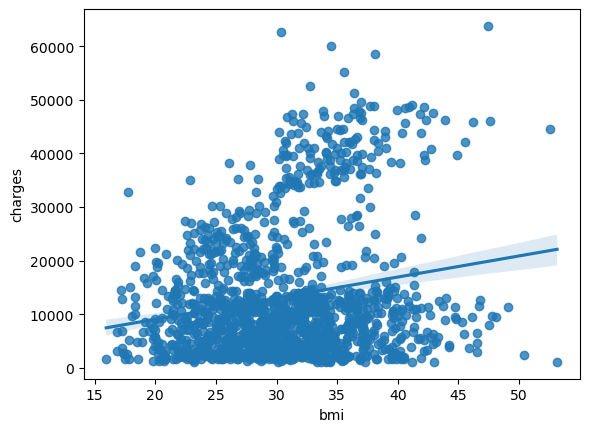

In [36]:
sns.regplot(x = 'bmi', y = 'charges', data = df)
plt.show();

# jointplot:  Draw a plot of two variables with bivariate and univariate graphs.

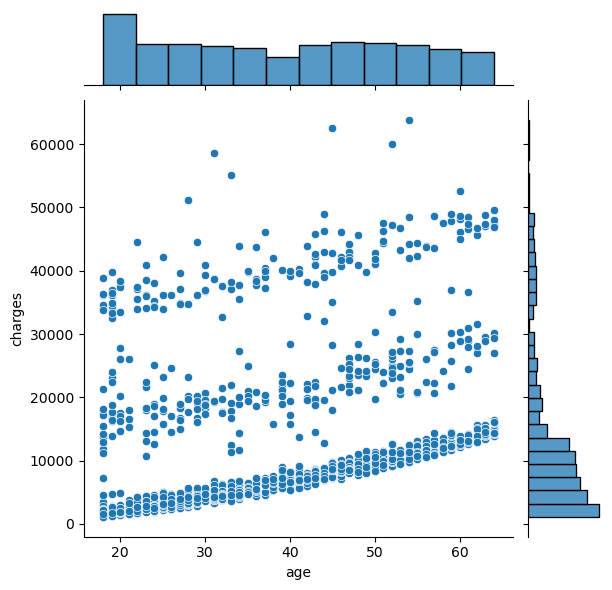

In [37]:
sns.jointplot(x = 'age', y = 'charges', data = df)
plt.show();

# residplot: Plot the residuals of a linear regression.

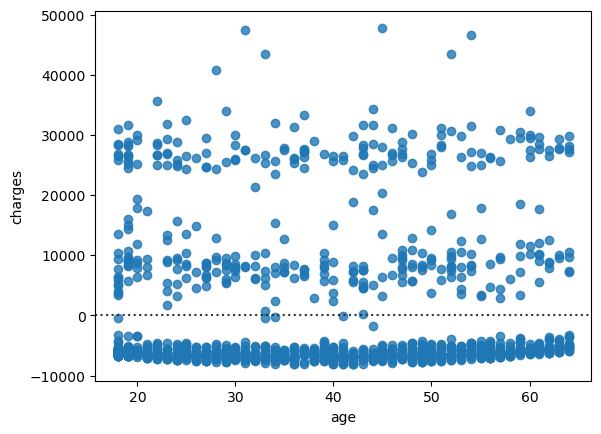

In [38]:
sns.residplot(x = 'age', y = 'charges', data = df)
plt.show();

### #Adding a LOWESS curve can help reveal or emphasize structure:

In [39]:
!python3 -m pip install statsmodels 

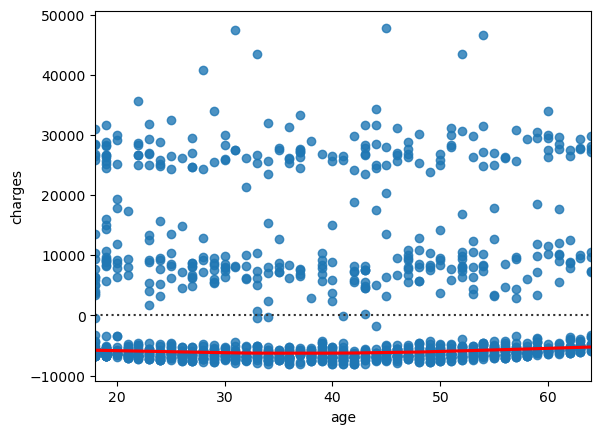

In [40]:
#Adding a LOWESS curve can help reveal or emphasize structure:
sns.residplot(data=df, x="age", y="charges", lowess=True, line_kws=dict(color="r"))
plt.show();

### Remove higher-order trends to test whether that stabilizes the residuals:

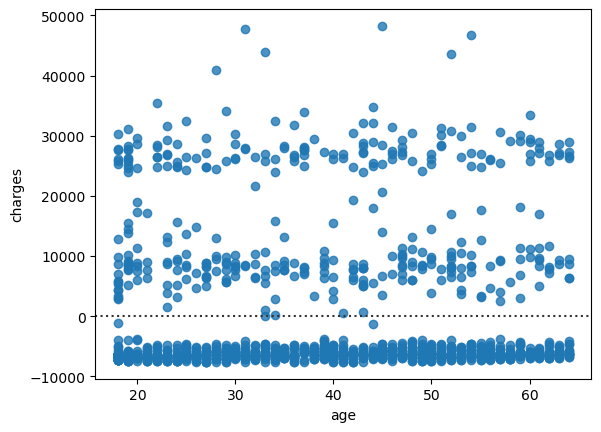

In [41]:
sns.residplot(x = 'age', y = 'charges', data = df, order=2)
plt.show();

# seaborn.lmplot:  Plot data and regression model fits across a FacetGrid.

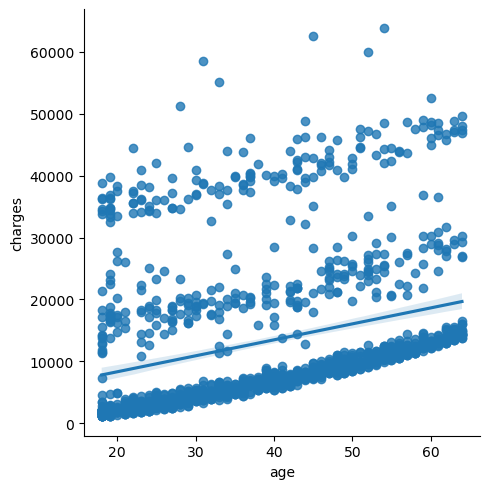

In [42]:
sns.lmplot(x = 'age', y = 'charges', data = df)
plt.show();

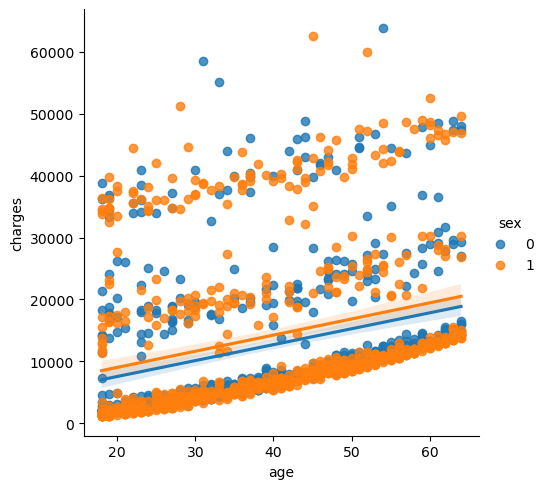

In [43]:
sns.lmplot(x = 'age', y = 'charges', data = df, hue='sex')
plt.show();

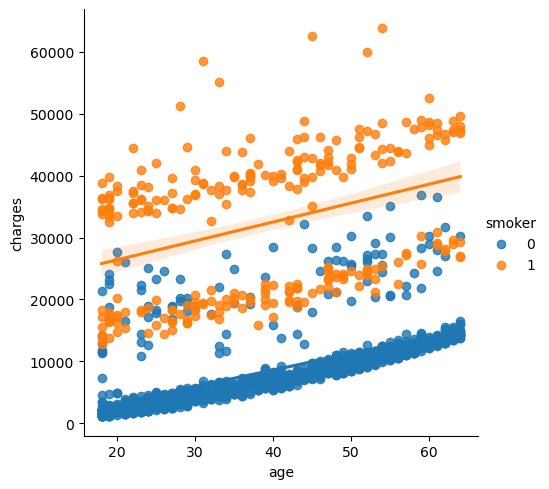

In [44]:
sns.lmplot(x = 'age', y = 'charges', data = df, hue='smoker')
plt.show();

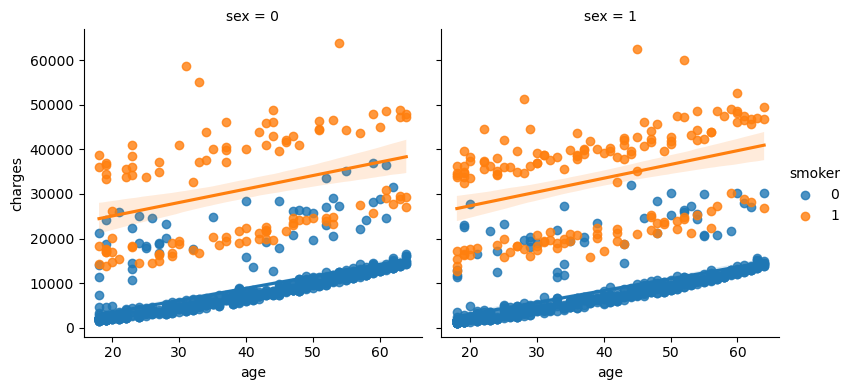

In [45]:
sns.lmplot(
    data=df, x="age", y="charges",
    hue="smoker", col="sex", height=4,
)
plt.show();

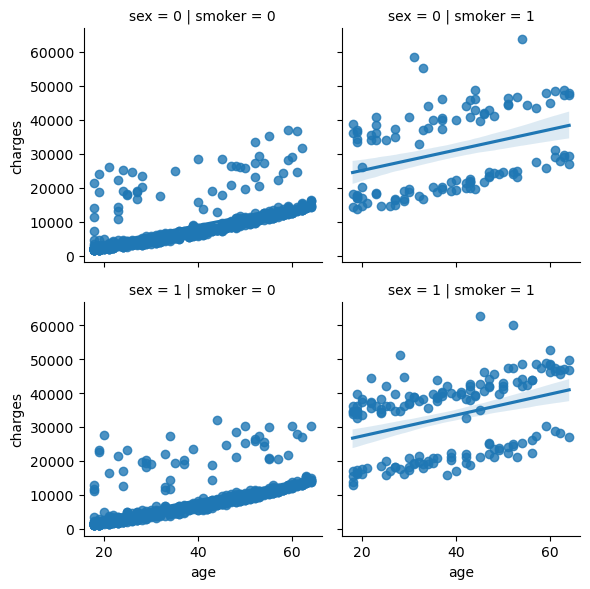

In [46]:
sns.lmplot(
    data=df, x="age", y="charges",
    col="smoker", row="sex", height=3,
)
plt.show();

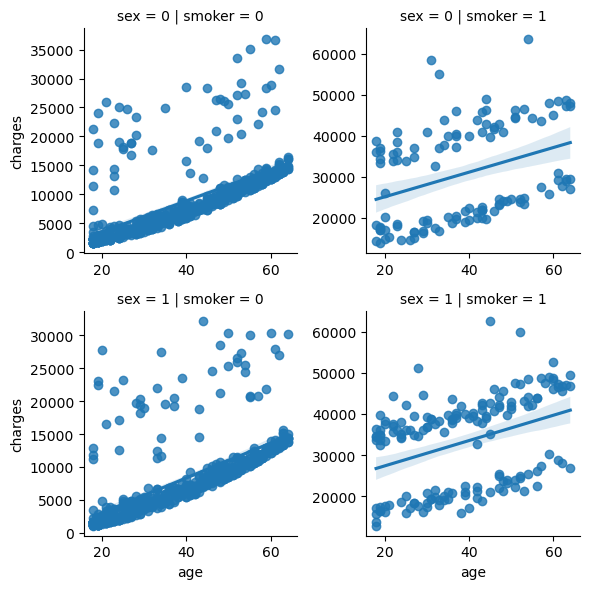

In [47]:
sns.lmplot(
    data=df, x="age", y="charges",
    col="smoker", row="sex", height=3,facet_kws=dict(sharex=False, sharey=False))
plt.show();

# Calculate and plot the correlation matrix?     Which feature has the most positive correlation with charges?

In [48]:
corr = df.corr()
corr

age       sex       bmi  children    smoker   charges  \
age        1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex       -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi        0.109272  0.046371  1.000000  0.012759  0.003750  0.198341   
children   0.042469  0.017163  0.012759  1.000000  0.007673  0.067998   
smoker    -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251   
charges    0.299008  0.057292  0.198341  0.067998  0.787251  1.000000   
northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945 -0.039905   
southeast -0.011642  0.017117  0.270025 -0.023066  0.068498  0.073982   
southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945 -0.043210   

           northwest  southeast  southwest  
age        -0.000407  -0.011642   0.010016  
sex        -0.011156   0.017117  -0.004184  
bmi        -0.135996   0.270025  -0.006205  
children    0.024806  -0.023066   0.021914  
smoker     -0.036945   0.068498  -0.036945  
charges    -0.039905   0.073982  -0.043210  
northwest   1.000000  -0.346265  -0.320829  
southeast  -0.346265   1.000000  -0.346265  
southwest  -0.320829  -0.346265   1.000000

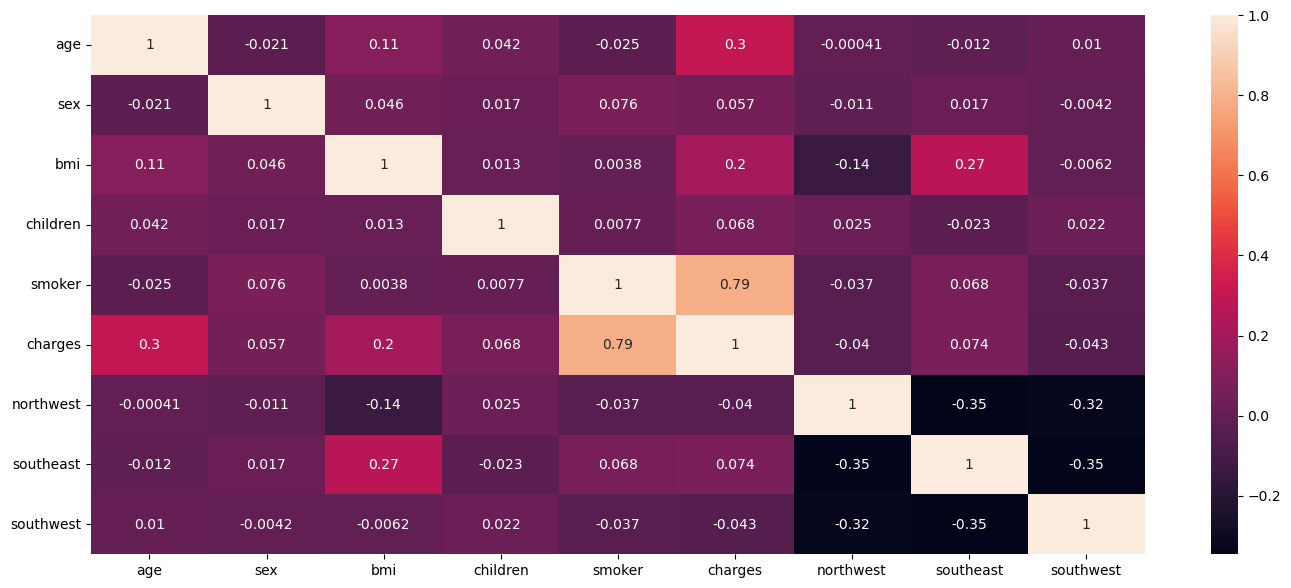

In [49]:
plt.figure(figsize=(17,7))
sns.heatmap(corr, annot=True)
plt.show();

## See between charges vs smoker strong co-relation matrix of 0.79. also age vs charges 0.3( little good co-relation).

# TASK#4: CREATE TRAINING AND TESTING DATASET.

In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [51]:
X = df.drop(columns =['charges'])
y = df['charges']

X

age  sex     bmi  children  smoker  northwest  southeast  southwest
0      19    0  27.900         0       1          0          0          1
1      18    1  33.770         1       0          0          1          0
2      28    1  33.000         3       0          0          1          0
3      33    1  22.705         0       0          1          0          0
4      32    1  28.880         0       0          1          0          0
...   ...  ...     ...       ...     ...        ...        ...        ...
1333   50    1  30.970         3       0          1          0          0
1334   18    0  31.920         0       0          0          0          0
1335   18    0  36.850         0       0          0          1          0
1336   21    0  25.800         0       0          0          0          1
1337   61    0  29.070         0       1          1          0          0

[1338 rows x 8 columns]

In [52]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [53]:
X.shape

(1338, 8)

In [54]:
y.shape

(1338,)

In [55]:
type(X)

pandas.core.frame.DataFrame

In [56]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [57]:
y = y.reshape(-1,1)

In [58]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [60]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Split the data into 20% Testing and 80% Training.

## Double check that the split was successful by getting the shape of both the training and testing datasets.

In [61]:
X_train.shape

(1070, 8)

In [62]:
X_test.shape

(268, 8)

In [63]:
df.shape

(1338, 9)

In [64]:
1338 * 0.2   # 20% test and 80% train

267.6

# TASK#5: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE).

In [65]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [66]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929767702696

In [67]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [68]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [69]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [70]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5796.284 
MSE = 33596910.0 
MAE = 4181.195 
R2 = 0.7835929892113018 
Adjusted R2 = 0.7769086027776742


## For data collection, there should be a significant discrepancy between the numbers. If you want to ignore outliers in your data, MAE is a preferable alternative, but if you want to account for them in your loss function, MSE/RMSE is the way to go. MSE is always higher than MAE in most cases, MSE equals MAE only when the magnitudes of the errors are the same.

# TASK#6:  LET'S TRY A MORE COMPLEX ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL.

In [71]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.6 requires mkl, which is not installed.


In [72]:
# optimizer = Adam()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

2023-10-01 16:52:29.792635: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [73]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 4s 7ms/step - loss: 0.6889 - val_loss: 0.2221
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3779 - val_loss: 0.1869
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3121 - val_loss: 0.2250
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2993 - val_loss: 0.1669
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2781 - val_loss: 0.1791
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2422 - val_loss: 0.1716
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2509 - val_loss: 0.1992
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2559 - val_loss: 0.1710
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2304 - val_loss: 0.1461
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2219 - val_loss: 0.1767
Epoch 11/

In [74]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.1882
Accuracy : 0.8118292391300201


In [75]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

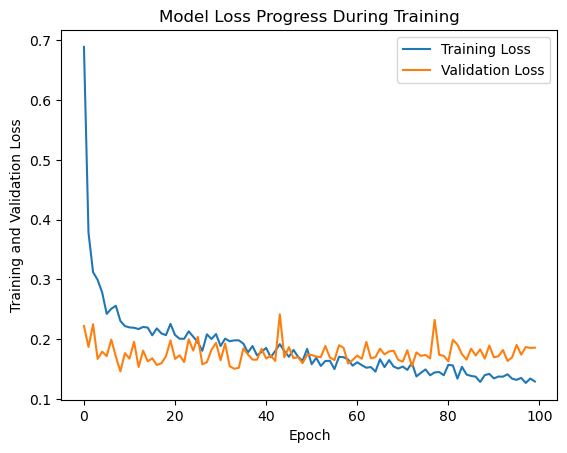

In [76]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

9/9 [==============================] - 0s 1ms/step


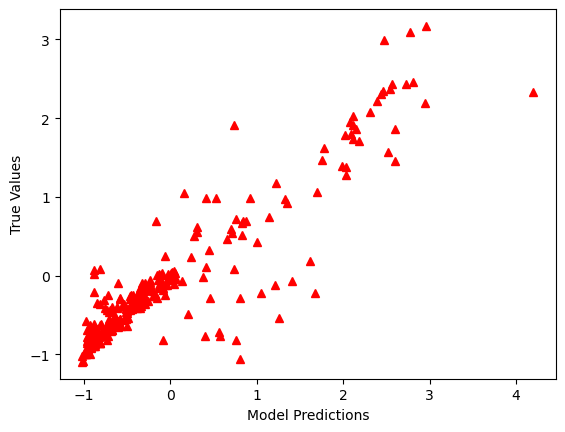

In [77]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [78]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

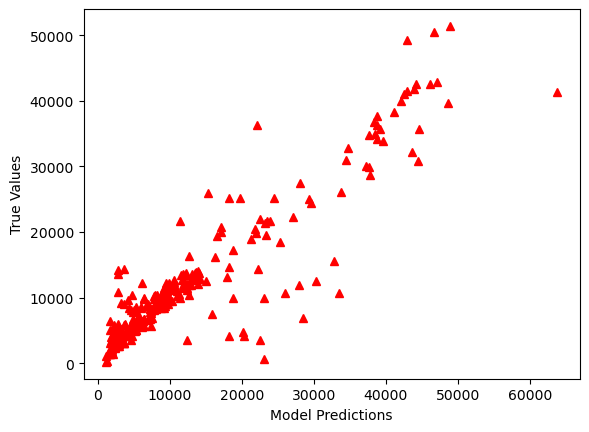

In [79]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [80]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5211.465 
MSE = 27159368.0 
MAE = 2932.5364 
R2 = 0.8250589896662371 
Adjusted R2 = 0.8196554063354645


## Experiment with a deeper network with more neurons in the hidden layer. 

## Experiment with no regularization (dropout).

# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER.

In [81]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::614112703346:role/service-role/AmazonSageMaker-ExecutionRole-20231001T192419


In [82]:
X_train.shape


(1070, 8)

In [83]:
y_train.shape


(1070, 1)

In [84]:
X_test.shape

(268, 8)

In [85]:
# y_train = y_train[:,0]

In [86]:
y_train.shape

(1070, 1)

In [87]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 

0

In [88]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-614112703346/linear_learner/train/linear-train-data


In [89]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-614112703346/linear_learner/output


In [90]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [91]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
NOTEBOOK_METADATA_FILE detected but failed to get valid domain and user from it.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-10-01-16-53-01-424


2023-10-01 16:53:01 Starting - Starting the training job...
2023-10-01 16:53:26 Starting - Preparing the instances for training......
2023-10-01 16:54:26 Downloading - Downloading input data...
2023-10-01 16:54:51 Training - Downloading the training image.........
2023-10-01 16:56:32 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[10/01/2023 16:56:22 INFO 140391525873472] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1

## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('absolute_loss_objective', 0.30221865823335736)
## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('mse', 0.29922346311194875)
## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('absolute_loss', 0.30221865823335736)
## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('rmse', 0.5470132202350769)
## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('r2', 0.7007765343737047)
## [10/01/2023 14:20:58 INFO 140512550336320] #train_score (algo-1) : ('mae', 0.3022186627474975)

## retrain the linear learner model using more epochs, more number of models.

## Experiment with a different loss function and report any improvement or degradation in results.

In [92]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 150,
                           num_models = 64,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-10-01-16-57-15-395


2023-10-01 16:57:15 Starting - Starting the training job...
2023-10-01 16:57:41 Starting - Preparing the instances for training......
2023-10-01 16:58:38 Downloading - Downloading input data...
2023-10-01 16:59:13 Training - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/01/2023 17:00:31 INFO 140290511951680] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta':

## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('absolute_loss_objective', 0.30221865823335736)
## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('mse', 0.29922346311194875)
## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('absolute_loss', 0.30221865823335736)
## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('rmse', 0.5470132202350769)
## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('r2', 0.7007765343737047)
## [10/01/2023 15:40:21 INFO 140354658764608] #train_score (algo-1) : ('mae', 0.3022186627474975)

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL

In [93]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-10-01-17-01-29-489
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-10-01-17-01-29-489
INFO:sagemaker:Creating endpoint with name linear-learner-2023-10-01-17-01-29-489


---------!

In [94]:
!pip install --upgrade sagemaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.2/892.2 kB 13.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for sagemaker: filename=sagemaker-2.188.0-py2.py3-none-any.whl size=1193913 sha256=f02d12b5ec775940f2f0e8cc4e6f45a9b4be6a3c4cdbd7cb05785c4929047563
  Stored in directory: /home/ec2-user/.cache/pip/wheels/94/00/3e/af9dde735e7ee826b11724be1de1a009a4179984f236a7a928
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.183.0
    Uninstalling sagemaker-2.183.0:
      Successfully uninstalled sagemaker-2.183.0


In [102]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.xlarge',
    serializer=CSVSerializer(),
    deserializer=JSONDeserializer()
)
# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

#linear_regressor.content_type = 'text/csv'
#linear_regressor.serializer = CSVSerializer
#linear_regressor.deserializer = JSONDeserializer

INFO:sagemaker:Creating model with name: linear-learner-2023-10-01-17-34-35-918
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-10-01-17-34-35-918
INFO:sagemaker:Creating endpoint with name linear-learner-2023-10-01-17-34-35-918


-----!

In [103]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [104]:
result # results are in Json format

{'predictions': [{'score': -0.3947466313838959},
  {'score': -0.6545196771621704},
  {'score': 2.3229310512542725},
  {'score': -0.42945200204849243},
  {'score': 1.3633484840393066},
  {'score': -0.5180152058601379},
  {'score': -1.112980604171753},
  {'score': 0.03642118722200394},
  {'score': -0.9007824659347534},
  {'score': -0.3309958577156067},
  {'score': 1.6265027523040771},
  {'score': -0.5096449851989746},
  {'score': -0.7669842839241028},
  {'score': 2.1663200855255127},
  {'score': 2.3962628841400146},
  {'score': 2.1298463344573975},
  {'score': -0.15974590182304382},
  {'score': 2.098792552947998},
  {'score': -0.4064822793006897},
  {'score': 1.8570022583007812},
  {'score': -0.836553156375885},
  {'score': -0.40815240144729614},
  {'score': -1.0079283714294434},
  {'score': -0.790063738822937},
  {'score': -0.29928848147392273},
  {'score': -0.15724188089370728},
  {'score': -0.031662486493587494},
  {'score': -0.7848987579345703},
  {'score': -0.33493945002555847},
  {

In [105]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [106]:
predictions


array([-3.94746631e-01, -6.54519677e-01,  2.32293105e+00, -4.29452002e-01,
        1.36334848e+00, -5.18015206e-01, -1.11298060e+00,  3.64211872e-02,
       -9.00782466e-01, -3.30995858e-01,  1.62650275e+00, -5.09644985e-01,
       -7.66984284e-01,  2.16632009e+00,  2.39626288e+00,  2.12984633e+00,
       -1.59745902e-01,  2.09879255e+00, -4.06482279e-01,  1.85700226e+00,
       -8.36553156e-01, -4.08152401e-01, -1.00792837e+00, -7.90063739e-01,
       -2.99288481e-01, -1.57241881e-01, -3.16624865e-02, -7.84898758e-01,
       -3.34939450e-01, -1.04250884e+00, -4.51300263e-01, -1.69042349e-01,
       -9.09027457e-01, -8.31512690e-01, -8.35221052e-01, -2.95454234e-01,
       -9.69451666e-01, -4.43430126e-01,  2.04857874e+00,  1.82355392e+00,
       -9.03080463e-01, -9.44698513e-01, -9.10999998e-02, -2.09295660e-01,
       -6.05485857e-01, -1.30122572e-01, -9.04769540e-01, -8.59987140e-01,
        2.03066230e+00, -6.21268392e-01,  3.83173302e-02, -1.02911830e+00,
       -4.20577645e-01, -

In [107]:
predictions.shape


(268,)

In [108]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-3.94746631e-01 -6.54519677e-01  2.32293105e+00 -4.29452002e-01
  1.36334848e+00 -5.18015206e-01 -1.11298060e+00  3.64211872e-02
 -9.00782466e-01 -3.30995858e-01  1.62650275e+00 -5.09644985e-01
 -7.66984284e-01  2.16632009e+00  2.39626288e+00  2.12984633e+00
 -1.59745902e-01  2.09879255e+00 -4.06482279e-01  1.85700226e+00
 -8.36553156e-01 -4.08152401e-01 -1.00792837e+00 -7.90063739e-01
 -2.99288481e-01 -1.57241881e-01 -3.16624865e-02 -7.84898758e-01
 -3.34939450e-01 -1.04250884e+00 -4.51300263e-01 -1.69042349e-01
 -9.09027457e-01 -8.31512690e-01 -8.35221052e-01 -2.95454234e-01
 -9.69451666e-01 -4.43430126e-01  2.04857874e+00  1.82355392e+00
 -9.03080463e-01 -9.44698513e-01 -9.10999998e-02 -2.09295660e-01
 -6.05485857e-01 -1.30122572e-01 -9.04769540e-01 -8.59987140e-01
  2.03066230e+00 -6.21268392e-01  3.83173302e-02 -1.02911830e+00
 -4.20577645e-01 -1.04266226e+00 -1.52938157e-01 -2.24397451e-01
 -7.83619285e-01  1.72153342e+00 -9.76970121e-02 -1.73255771e-01
 -8.40835273e-04 -5.76535285e-01  5.08505180e-02 -5.32467544e-01
 -2.21164525e-01 -8.54527831e-01  1.46262789e+00 -2.63463527e-01
 -9.58128273e-01 -8.42812538e-01 -4.58871245e-01 -2.95394599e-01
 -3.26654553e-01 -5.09294212e-01 -3.58139932e-01 -6.29830480e-01
 -7.07826376e-01 -2.58105725e-01 -7.30510771e-01 -4.01083142e-01
 -9.63586509e-01  2.32990766e+00 -6.66841328e-01  1.63179517e+00
  1.70116305e+00  2.11922145e+00 -6.95587456e-01 -2.18821347e-01
 -4.48548496e-01 -1.21231072e-01  1.22359581e-01  2.30651975e+00
  2.02835131e+00 -6.94308817e-01  1.76294935e+00 -4.56858635e-01
  1.66690052e+00 -9.51466978e-01  1.59877801e+00 -6.35137081e-01
 -7.83403158e-01 -1.00848007e+00 -4.22604620e-01 -6.00849316e-02
 -1.15368031e-01 -9.65978503e-01 -4.16228533e-01  2.02413344e+00
 -1.09307671e+00  2.08300018e+00 -9.78686929e-01 -6.65776014e-01
 -4.98503968e-02  1.80268002e+00 -2.67024904e-01 -9.35853124e-01
 -8.40541050e-02  1.93380797e+00 -5.54653347e-01 -9.65723753e-01
 -5.73080719e-01 -4.70548093e-01 -9.64245722e-02 -8.47437799e-01
 -8.55433106e-01 -4.67200994e-01 -3.90842557e-01 -2.93007046e-01
 -6.23441562e-02 -8.04102421e-01 -7.29300678e-01 -5.54869056e-01
 -5.44226885e-01 -2.96222597e-01 -5.22500694e-01 -2.61529908e-02
 -6.11084878e-01  1.88820744e+00  2.00985527e+00  1.83516514e+00
 -6.88472271e-01 -2.10427880e-01 -8.07828903e-01 -1.74786329e-01
 -9.34852004e-01  2.03932381e+00 -7.21094310e-01 -7.40069032e-01
 -1.87590092e-01 -6.30122185e-01  2.25209332e+00 -9.63529110e-01
 -9.23377037e-01  1.76113200e+00 -4.74211633e-01 -5.95070958e-01
 -1.61191076e-03 -3.69999349e-01  1.41770220e+00  1.92936885e+00
 -3.42938229e-02 -1.05626941e+00 -1.80347487e-02 -9.49217558e-01
 -8.29081357e-01 -3.90314937e-01  2.45322204e+00  2.21392035e+00
  2.00268435e+00 -8.60195339e-01 -4.03447032e-01 -5.04020035e-01
 -3.97710800e-01 -8.03660095e-01 -9.61413145e-01  1.96158457e+00
  1.35299504e+00  9.00810733e-02  1.55763268e+00 -2.62669146e-01
  2.37910557e+00 -1.03950667e+00 -5.17600715e-01 -6.01959229e-01
 -7.72511959e-01 -8.84754360e-01 -7.38806546e-01 -7.77418315e-01
 -1.97258174e-01 -2.74380147e-01 -7.81428695e-01 -9.94045079e-01
 -9.70115304e-01  1.75583899e+00  2.78371051e-02 -2.51754045e-01
 -1.06964457e+00 -1.54936999e-01 -1.02491105e+00 -3.56419921e-01
 -9.60757554e-01  2.04613686e+00 -5.80315590e-01 -1.03377128e+00
  1.39371383e+00  1.50465858e+00 -3.98690760e-01 -9.94605303e-01
 -2.68486261e-01 -9.41352248e-01 -1.51355147e-01 -2.06503123e-01
 -1.24602832e-01  1.49179578e+00 -5.66925466e-01 -7.41175294e-01
 -6.92531765e-01 -7.69733116e-02 -1.55714989e-01 -5.83826423e-01
 -9.25594032e-01 -3.89829814e-01 -3.78258586e-01  2.03156757e+00
 -9.58197355e-01  1.58620524e+00 -1.09837043e+00 -1.04122043e+00
 -2.89796561e-01 -1.29390925e-01 -9.03277278e-01 -4.51350451e-01
 -7.89719462e-01  1.88656819e+00 -4.26076770e-01 -2.82038748e-01
 -8.39364707e-01 -4.57553744e-01  2.05009174e+00 -9.14447069e-01
 -1.79478168e-01  1.70280075e+00 -8.50220919e-01 -8.29971552e-01
 -1.09986579e+00 -8.80766511e-01 -7.80499101e-01 -6.85853302e-01
  1.60833672e-02 -1.18320394e+00 -9.78711963e-01 -4.23742473e-01
 -8.42369795e-01 -2.03855932e-01 -9.90421891e-01 -8.27140987e-01
 -1.14502989e-01 -8.28170776e-01 -3.93959463e-01 -6.26019597e-01
 -5.14986157e-01 -1.96555883e-01  1.53661799e+00  2.39968419e+00
 -1.97269708e-01 -5.56613505e-01  2.34912181e+00 -2.19363660e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5211.465 
MSE = 27159368.0 
MAE = 2932.5364 
R2 = 0.8250589896662371 
Adjusted R2 = 0.8196554063354645


In [110]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-10-01-17-34-35-918
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-10-01-17-34-35-918
